In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
%matplotlib inline

In [2]:
celebs = ['Irrfan_Khan', 'Jacqueline_Fernandez', 'Juhi_Chawla', 
          'Kajal_Aggarwal', 'Paresh_Rawal']

In [3]:
def prepare_image(file_name):
    img_path = 'D:\Studies\PICT\T&P\Flourisense\Facedoc\MobileNet\data\celeb_faces_dataset\custom_test\\'
    img = image.load_img(img_path + file_name, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [18]:
image_name = 'Jacqueline_Fernandez_Test.jpg'
processed_test_image = prepare_image(image_name)

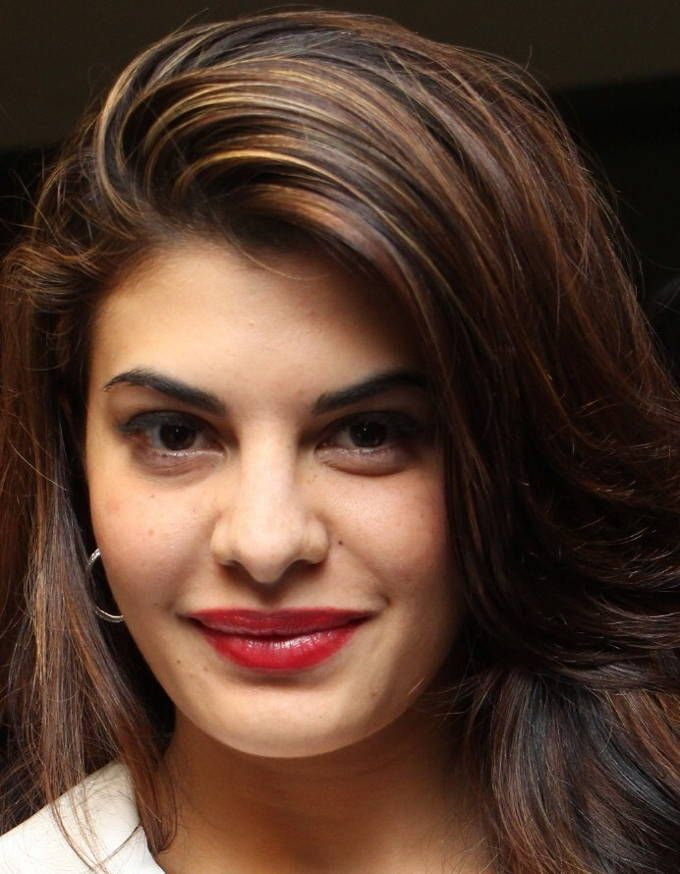

In [19]:
Image(filename = 'D:\Studies\PICT\T&P\Flourisense\Facedoc\MobileNet\data\celeb_faces_dataset\custom_test\\' + image_name,
      width = 340, height = 437)

In [13]:
curr_model = tf.keras.models.load_model('models\model_3_82.67_MobileNet.h5')

In [14]:
curr_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)   

In [15]:
def recognize(image, model):
    pred_arr = model.predict(image)
    print(pred_arr)
    sns.barplot(x = celebs, y = pred_arr[0])
    plt.xticks(rotation=90, ha='right')
    name = celebs[np.where(pred_arr[0] == pred_arr[0].max())[0][0]]
    return name

[[1.2700391e-05 5.3477198e-02 3.3210036e-03 9.4304693e-01 1.4216256e-04]]


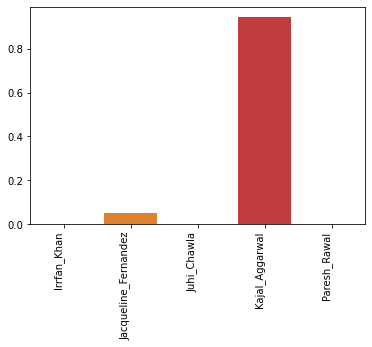

In [20]:
name = recognize(processed_test_image, curr_model)

In [21]:
name

'Kajal_Aggarwal'